# Bike Share System

*Modeling and Simulation in Python*

Copyright 2021 Allen Downey

License: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/)

In [1]:
# import functions from modsim
from modsim import *

In [2]:
def step(state, p1, p2):
    """Simulate one time step.
    
    state: bikeshare State object
    p1: probability of an Olin->Wellesley ride
    p2: probability of a Wellesley->Olin ride
    """
    if flip(p1):
        bike_to_wellesley(state)
    
    if flip(p2):
        bike_to_olin(state)
        
def bike_to_olin(state):
    """Move one bike from Wellesley to Olin.
    
    state: bikeshare State object
    """
    if state.wellesley == 0:
        state.wellesley_empty += 1
        return
    state.wellesley -= 1
    state.olin += 1
    
def bike_to_wellesley(state):
    """Move one bike from Olin to Wellesley.
    
    state: bikeshare State object
    """
    
    if state.olin == 0:
        state.olin_empty += 1
        return
    state.olin -= 1
    state.wellesley += 1

In [53]:
def run_simulation(state, p1, p2, num_steps, do_plot=True):
    """Simulate the given number of time steps.
    
    state: State object
    p1: probability of an Olin->Wellesley customer arrival
    p2: probability of a Wellesley->Olin customer arrival
    num_steps: number of time steps
    """
    results_olin = TimeSeries()
    results_olin[0] = state.olin
    results_wellesley = TimeSeries()
    results_wellesley[0] = state.wellesley
    results_olin_unsatisfied = TimeSeries()
    results_olin_unsatisfied[0] = state.olin_empty
    results_wellesley_unsatisfied = TimeSeries()
    results_wellesley_unsatisfied[0] = state.wellesley_empty
    
    for i in range(num_steps):
        step(state, p1, p2)
        results_olin[i+1] = state.olin
        results_wellesley[i+1] = state.wellesley
        results_olin_unsatisfied[i+1] = state.olin_empty
        results_wellesley_unsatisfied[i+1] = state.wellesley_empty
        
    if (do_plot):
        fig, ax = plt.subplots(1,2,figsize=(12,6))
        ax[0].plot(results_olin, label='Olin')
        ax[0].plot(results_wellesley, label='Wellesley')
        ax[0].set_xlabel('Time step (min)')
        ax[0].set_ylabel('Number of bikes')
        ax[0].legend()
        ax[1].plot(results_olin_unsatisfied, label='Olin')
        ax[1].plot(results_wellesley_unsatisfied, label='Wellesley')
        ax[1].set_xlabel('Time step (min)')
        ax[1].set_ylabel('Number of unsatisfied customers')
        ax[1].legend()
        plt.show()
    
    return results_olin_unsatisfied[num_steps-1] + results_wellesley_unsatisfied[num_steps-1]

4.0 8.0


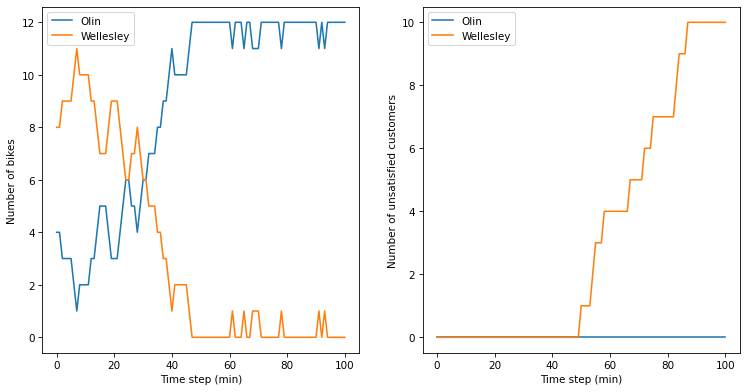

Total unsatisfied customers:  10.0


In [58]:
p_olin_to_wellesley = 0.3
p_wellesley_to_olin = 0.2

N_slots = 12
N_start_olin = np.round(p_wellesley_to_olin/(p_olin_to_wellesley + p_wellesley_to_olin) * N_slots)-1
N_start_wellesley = N_slots - N_start_olin

print(N_start_olin, N_start_wellesley)

bikeshare = State(olin=N_start_olin, wellesley=N_start_wellesley,
                  olin_empty=0, wellesley_empty=0)
do_plot = True
total_unsatisfied = run_simulation(bikeshare, p_wellesley_to_olin, p_olin_to_wellesley, 100, do_plot)

print("Total unsatisfied customers: ", total_unsatisfied)

## Modeling a Bike Share System

Imagine a bike share system for students traveling between Olin College and Wellesley College, which are about three miles apart in eastern Massachusetts.

Suppose the system contains 12 bikes and two bike racks, one at Olin and one at Wellesley, each with the capacity to hold 12 bikes.

As students arrive, check out a bike, and ride to the other campus, the number of bikes in each location changes. In the simulation, we'll need to keep track of where the bikes are. To do that, we'll use a function called `State`, which is defined in the ModSim library.

## Under the Hood

This section contains additional information about the functions we've used and pointers to their documentation.

You don't need to know anything in this section, so if you are already feeling overwhelmed, you might want to skip it.
But if you are curious, read on.

`State` and `TimeSeries` objects are based on the `Series` object defined by the Pandas library.
The documentation is at <https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html>.

`Series` objects provide their own `plot` function, which is why we call it like this:

```
results.plot()
```

Instead of like this:

```
plot(results)
```

You can read the documentation of `Series.plot` at <https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.html>.

`decorate` is based on Matplotlib, which is a widely used plotting library for Python.  Matplotlib provides separate functions for `title`, `xlabel`, and `ylabel`.
`decorate` makes them a little easier to use.
For the list of keyword arguments you can pass to `decorate`, see <https://matplotlib.org/3.2.2/api/axes_api.html?highlight=axes#module-matplotlib.axes>.

The `flip` function uses NumPy's `random` function to generate a random number between 0 and 1, then returns `True` or `False` with the given probability.

You can get the source code for `flip` (or any other function) by running the following cell.

In [6]:
source_code(flip)

def flip(p=0.5):
    """Flips a coin with the given probability.

    p: float 0-1

    returns: boolean (True or False)
    """
    return np.random.random() < p
